In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Phần 1

<h3 style="color: skyblue">1. Đọc dữ liệu</3> 


In [6]:
# 1, đọc file dữ liệu
df = pd.read_csv('data-final-exam-01.csv')
# hien thi toan bo du lieu cua file
df.head()

,CartCode,Total,Discount,CustomerSalary,CustomerAge,Sex,MaritalStatus,IntervalTime,UseCreditCard,ListOfProduct
0,C0,131,0.02,1178,36,F,1,I4,NO,shrimp>almonds>avocado>vegetables mix>green gr...
1,C1,96,0.08,898,49,M,1,I3,YES,burgers>meatballs>eggs
2,C2,76,0.22,818,22,F,1,I1,YES,chutney
3,C3,133,0.08,2071,58,F,1,I4,NO,turkey>avocado
4,C4,229,0.07,860,26,M,1,I4,YES,mineral water>milk>energy bar>whole wheat rice...



<h3 style="color: skyblue">2. Phân loại định lượng - định tính </h3>

In [5]:
#phan cac loai bien
dinhluong_column=df.select_dtypes(include=['int64', 'float64']).columns
dinhtinh_column=df.select_dtypes(include=['object']).columns

print(f"Biến định lượng: {dinhluong_column}")
print(f"Biến định tính: {dinhtinh_column}")
# Kiểu dữ liệu và thang đo:
# - Biến định lượng: thường là kiểu số nguyên (int) hoặc số thực (float), thang đo: tỉ lệ hoặc khoảng.
# - Biến định tính: thường là kiểu chuỗi (object), thang đo: danh nghĩa hoặc thứ bậc.

Biến định lượng: Index(['Total', 'Discount', 'CustomerSalary', 'CustomerAge', 'MaritalStatus'], dtype='object')
Biến định tính: Index(['CartCode', 'Sex', 'IntervalTime', 'UseCreditCard', 'ListOfProduct'], dtype='object')



<h3 style="color: skyblue">3. Phân thang đo </h3>

<img src="./thangDo.png"></img>

<img src="./thangDo2.png"></img>

In [8]:
def kieu_dl(df):
    for col in df.columns:
        dtype = df[col].dtype
        if dtype == 'int64' or dtype == 'float64':
            # Định lượng - thường là tỷ lệ hoặc thứ tự
            scale = "Ratio scale" if dtype == 'float64' else "Ordinal scale"
            print(f"Biến '{col}' là định lượng ({dtype}) - Thang đo: {scale}")
        else:
            # Định tính - thường là danh nghĩa
            print(f"Biến '{col}' là định tính ({dtype}) - Thang đo: Nominal scale")

# Gọi hàm để phân tích và in ra kiểu dữ liệu và thang đo
kieu_dl(df)

Biến 'CartCode' là định tính (object) - Thang đo: Nominal scale
Biến 'Total' là định lượng (int64) - Thang đo: Ordinal scale
Biến 'Discount' là định lượng (float64) - Thang đo: Ratio scale
Biến 'CustomerSalary' là định lượng (int64) - Thang đo: Ordinal scale
Biến 'CustomerAge' là định lượng (int64) - Thang đo: Ordinal scale
Biến 'Sex' là định tính (object) - Thang đo: Nominal scale
Biến 'MaritalStatus' là định lượng (int64) - Thang đo: Ordinal scale
Biến 'IntervalTime' là định tính (object) - Thang đo: Nominal scale
Biến 'UseCreditCard' là định tính (object) - Thang đo: Nominal scale
Biến 'ListOfProduct' là định tính (object) - Thang đo: Nominal scale


<h3 style="color: skyblue">4. Biểu đồ dữ liệu thiếu </h3>

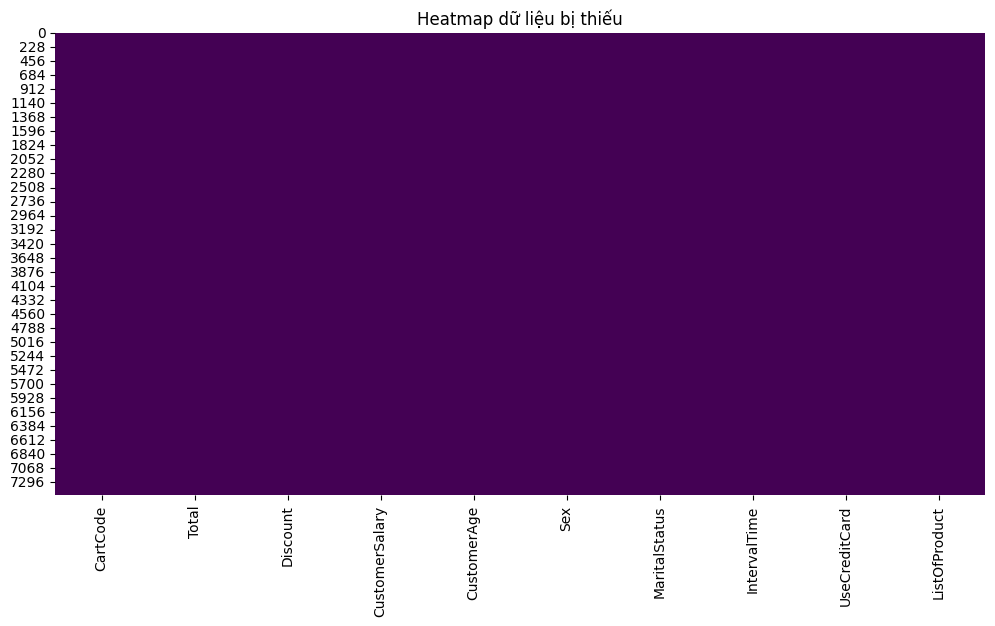

In [10]:
# 2 dùng biểu đồ để trực quan hóa dữ liệu bị thiếu
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap dữ liệu bị thiếu')
plt.show()
# kết luận: không có dữ liệu thiếu

<h3 style="color: skyblue">5. Thay thế các giá trị bị thiếu bằng yếu vị (mode) cho từng cột
</h3>


In [11]:
## Thay thế các giá trị bị thiếu bằng yếu vị (mode) cho từng cột
for column in df.columns:
    mode_value = df[column].mode()[0]  # Tìm yếu vị (mode) của cột
    df[column].fillna(mode_value, inplace=True)  # Thay thế giá trị thiếu bằng yếu vị

# Kiểm tra lại dữ liệu sau khi thay thế
print(df.isnull().sum())


CartCode          0
Total             0
Discount          0
CustomerSalary    0
CustomerAge       0
Sex               0
MaritalStatus     0
IntervalTime      0
UseCreditCard     0
ListOfProduct     0
dtype: int64


C:\Users\Tieu Bao\AppData\Local\Temp\ipykernel_21216\1702721221.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)  # Thay thế giá trị thiếu bằng yếu vị
C:\Users\Tieu Bao\AppData\Local\Temp\ipykernel_21216\1702721221.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

<h3 style="color: skyblue">6. Thay thế các giá trị bị thiếu bằng trung bình (mean) cho các biến định lượng
</h3>

In [12]:
# Thay thế các giá trị bị thiếu bằng trung bình (mean) cho các biến định lượng
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    mean_value = df[column].mean()  # Tìm giá trị trung bình của cột
    df[column].fillna(mean_value, inplace=True)  # Thay thế giá trị thiếu bằng trung bình

# Kiểm tra lại dữ liệu sau khi thay thế
print(df.isnull().sum())


CartCode          0
Total             0
Discount          0
CustomerSalary    0
CustomerAge       0
Sex               0
MaritalStatus     0
IntervalTime      0
UseCreditCard     0
ListOfProduct     0
dtype: int64


C:\Users\Tieu Bao\AppData\Local\Temp\ipykernel_21216\1727732677.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)  # Thay thế giá trị thiếu bằng trung bình


<h3 style="color: skyblue">7. Sửa dữ liệu của 1 cột nào đó theo điều kiện nào đó. Hiển thị dữ liệu của cột này.
</h3>

In [14]:
# 3, Sửa dữ liệu của 1 cột nào đó theo điều kiện nào đó. Hiển thị dữ liệu của cột này.
print(df['Discount'].head())

0    0.02
1    0.08
2    0.22
3    0.08
4    0.07
Name: Discount, dtype: float64


In [15]:
# Kiểm tra nếu cột "Discount" tồn tại trong dữ liệu
if 'Discount' in df.columns:
    # Cập nhật cột "Discount" bằng cách tăng thêm 1.0 cho những giá trị lớn hơn 0.2
    df.loc[df['Discount'] > 0.2, 'Discount'] = df['Discount'] + 1.0
else:
    print("Cột 'Discount' không tồn tại trong dữ liệu.")

In [16]:
# Hiển thị dữ liệu sau khi sửa đổi của cột "Discount"
print(df['Discount'].head())

0    0.02
1    0.08
2    1.22
3    0.08
4    0.07
Name: Discount, dtype: float64


<h3 style="color: skyblue">8. Lưu dữ liệu sau khi xử lý vào file mới</h3>

In [17]:
# 4, Lưu dữ liệu sau khi xử lý vào file mới
new_file_path = 'data-final-exam-01_clean.csv'
df.to_csv(new_file_path, index=False)  # index=False để không lưu chỉ mục

In [37]:
# đọc file dữ liệu vừa mới được lưu
df2 = pd.read_csv('data-final-exam-01_clean.csv')
# hien thi toan bo du lieu cua file
df2.head()

,CartCode,Total,Discount,CustomerSalary,CustomerAge,Sex,MaritalStatus,IntervalTime,UseCreditCard,ListOfProduct
0,C0,131,0.02,1178,36,F,1,I4,NO,shrimp>almonds>avocado>vegetables mix>green gr...
1,C1,96,0.08,898,49,M,1,I3,YES,burgers>meatballs>eggs
2,C2,76,1.22,818,22,F,1,I1,YES,chutney
3,C3,133,0.08,2071,58,F,1,I4,NO,turkey>avocado
4,C4,229,0.07,860,26,M,1,I4,YES,mineral water>milk>energy bar>whole wheat rice...


### Phần 2

#### 1. Đọc dữ liệu 

In [7]:
# 1, đọc file dữ liệu còn lại
data = pd.read_csv('data-quizth03.csv')
data.head()

,CartCode,Total,Discount,CustomerSalary,CustomerAge,ListOfProduct
0,C0,100,0.09,1472,29,shrimp>almonds>avocado>vegetables mix>green gr...
1,C1,75,0.17,2113,24,burgers>meatballs>eggs
2,C2,162,0.06,1015,39,chutney
3,C3,94,0.03,2123,56,turkey>avocado
4,C4,114,0.25,1631,33,mineral water>milk>energy bar>whole wheat rice...


#### 2. Nối bảng 

In [8]:
# trộn hai bảng dữ liệu lại với nhau
merged_data = pd.concat([df, data], axis=0)
merged_data.head()

,CartCode,Total,Discount,CustomerSalary,CustomerAge,Sex,MaritalStatus,IntervalTime,UseCreditCard,ListOfProduct
0,C0,131,0.02,1178,36,F,1.0,I4,NO,shrimp>almonds>avocado>vegetables mix>green gr...
1,C1,96,0.08,898,49,M,1.0,I3,YES,burgers>meatballs>eggs
2,C2,76,0.22,818,22,F,1.0,I1,YES,chutney
3,C3,133,0.08,2071,58,F,1.0,I4,NO,turkey>avocado
4,C4,229,0.07,860,26,M,1.0,I4,YES,mineral water>milk>energy bar>whole wheat rice...


#### 3. Biểu đồ 

#### Barplot

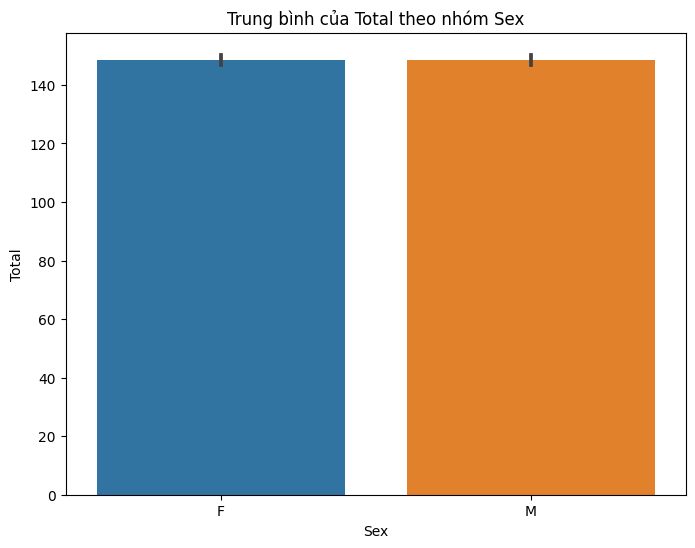

In [9]:
# 2, Vẽ biểu đồ barplot hiển thị trung bình của "Total" theo nhóm "Sex"
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Total', data=merged_data)
plt.title('Trung bình của Total theo nhóm Sex')
plt.show()


#### Boxplot

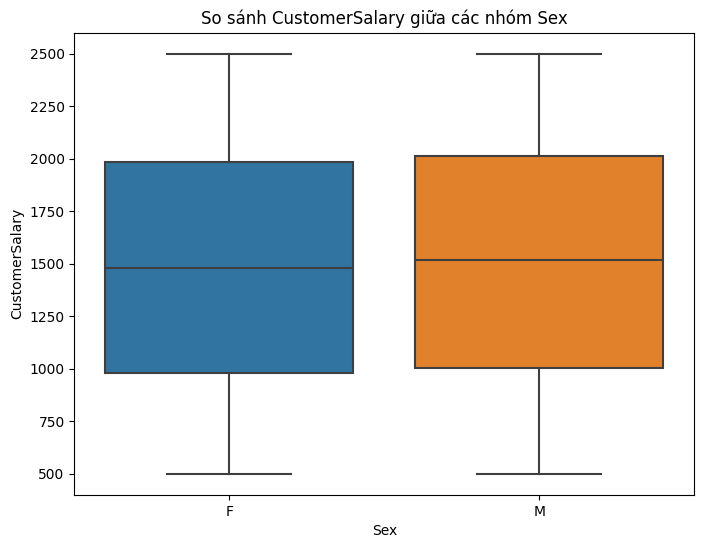

In [27]:
# 3, Vẽ biểu đồ boxplot so sánh CustomerSalary giữa các nhóm Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='CustomerSalary', data=merged_data)
plt.title('So sánh CustomerSalary giữa các nhóm Sex')
plt.show()


### HeatMap

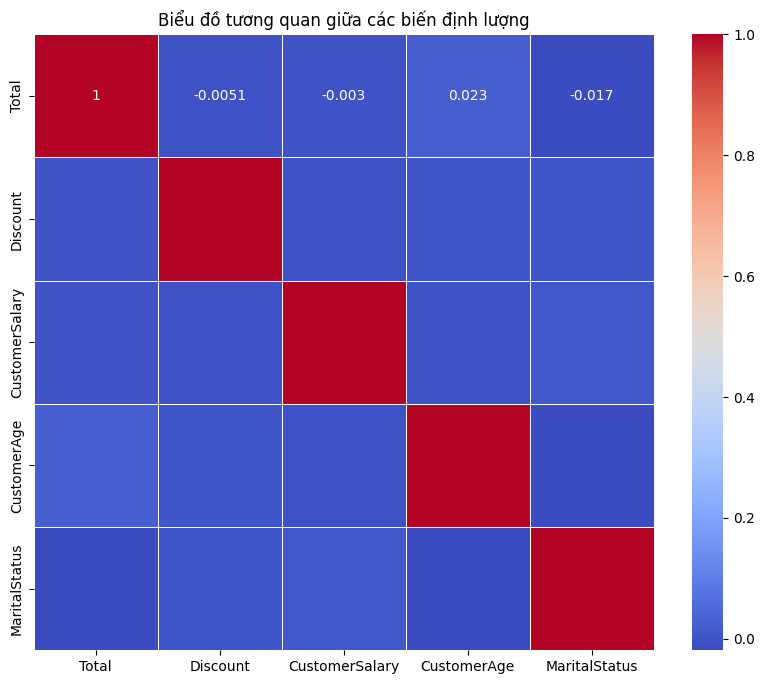

In [39]:
# 4, Vẽ biểu đồ heatmap để hiển thị ma trận tương quan
numerical_columns = merged_data.select_dtypes(include=['number'])

# Tính ma trận tương quan giữa các biến định lượng
correlation_matrix = numerical_columns.corr()

# Vẽ biểu đồ heatmap thể hiện sự tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Thêm tiêu đề
plt.title('Biểu đồ tương quan giữa các biến định lượng')

# Hiển thị biểu đồ
plt.show()

#### Pie

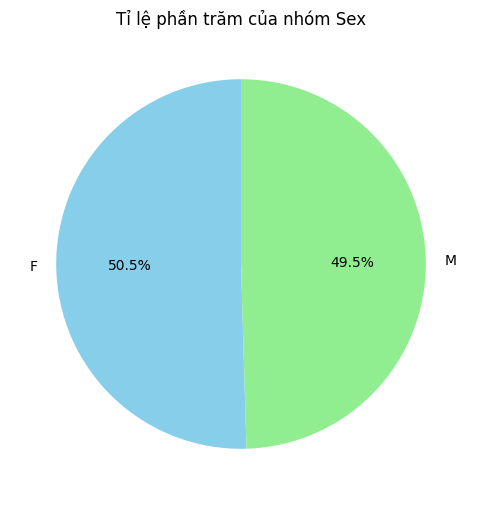

In [29]:
#5, vẽ biểu đồ tròn thể hiện tỷ lệ phần trăm
# Tính tỉ lệ phần trăm của nhóm Sex
sex_counts = merged_data['Sex'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Tỉ lệ phần trăm của nhóm Sex')
plt.show()


#### Boxplot

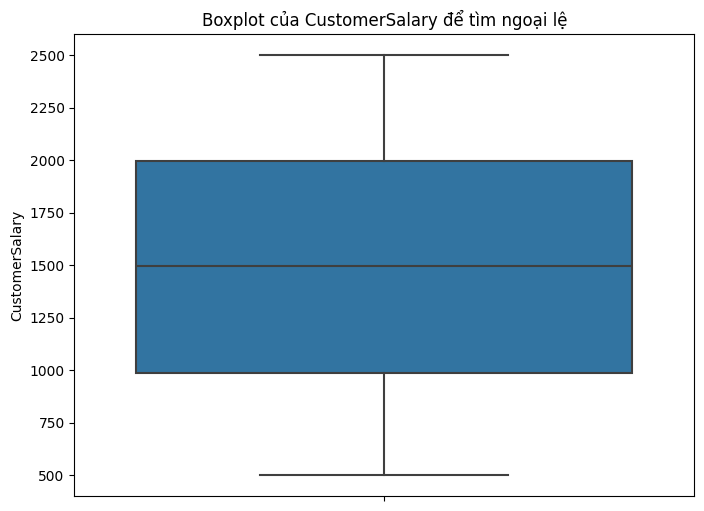

IQR của cột CustomerSalary là: 1010.0
Giới hạn dưới: -527.0
Giới hạn trên: 3513.0
Số lượng bản ghi trước khi loại bỏ: 15002
Dữ liệu sau khi loại bỏ ngoại lệ: (15002, 10)


In [11]:
# 6, Dùng biểu đồ boxlot để tìm giá trị ngoại lệ cho 1 thuộc tính nào đó. Tìm độ trải giữa (IQR) của cột dữ liệu bị ngoại lệ. Loại bỏ dữ liệu ngoại lệ. 
# Vẽ boxplot để tìm ngoại lệ trong cột CustomerSalary
plt.figure(figsize=(8, 6))
sns.boxplot(y='CustomerSalary', data=merged_data)
plt.title('Boxplot của CustomerSalary để tìm ngoại lệ')
plt.show()

# Tính IQR và loại bỏ giá trị ngoại lệ
Q1 = merged_data['CustomerSalary'].quantile(0.25)
Q3 = merged_data['CustomerSalary'].quantile(0.75)
IQR = Q3 - Q1

# Tính giới hạn dưới và giới hạn trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ dữ liệu ngoại lệ
filtered_data = merged_data[~((merged_data['CustomerSalary'] < (Q1 - 1.5 * IQR)) | (merged_data['CustomerSalary'] > (Q3 + 1.5 * IQR)))]



print(f'IQR của cột CustomerSalary là: {IQR}')
print(f'Giới hạn dưới: {lower_bound}')
print(f'Giới hạn trên: {upper_bound}')
print(f'Số lượng bản ghi trước khi loại bỏ: {merged_data.shape[0]}')
print(f'Dữ liệu sau khi loại bỏ ngoại lệ: {filtered_data.shape}')



Phần 3

 Z-Test

In [41]:
# 1, Thực hiện kiểm định trung bình của 2 biến số (định lượng) bằng phương pháp Z-Test bằng một giá trị nào đó với mức sai lầm là 10%. Cho nhận xét
from statsmodels.stats.weightstats import ztest

# Thực hiện Z-test để kiểm định trung bình của 2 biến
z_stat, p_value = ztest(merged_data['Total'], merged_data['CustomerSalary'])

# So sánh p_value với mức sai lầm 5% 
alpha = 0.05

print(f"Z-statistic: {z_stat}, P-value: {p_value}")
if p_value < alpha:
    print("Kết luận: Bác bỏ giả thuyết H0, trung bình của hai biến khác nhau.")
else:
    print("Kết luận: Chưa đủ bằng chứng để bác bỏ giả thuyết H0, trung bình của hai biến có thể bằng nhau.")


Z-statistic: -282.64565608395714, P-value: 0.0
Kết luận: Bác bỏ giả thuyết H0, trung bình của hai biến khác nhau.


Chi-Square

In [33]:
# 3, Thực hiện kiểm tra 2 biến định lượng có tương quan với nhau không bằng phương pháp Chi-Square với mức sai lầm là 5%? Cho nhận xét.
from scipy.stats import chi2_contingency

# Tạo bảng tần suất chéo giữa hai biến Total và CustomerAge
contingency_table = pd.crosstab(merged_data['Total'], merged_data['CustomerAge'])

# Thực hiện kiểm định Chi-Square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# So sánh p_value với mức sai lầm 5% (0.05)
alpha = 0.05

print(f"Chi2-statistic: {chi2_stat}, P-value: {p_value}")
if p_value < alpha:
    print("Kết luận: Có mối tương quan giữa hai biến.")
else:
    print("Kết luận: Không có mối tương quan giữa hai biến.")


Chi2-statistic: 8006.479603628374, P-value: 0.47747888550232054
Kết luận: Không có mối tương quan giữa hai biến.


ANOVA 2

In [34]:
# 4, Thực hiện kiểm định ANOVA 2 chiều. Giải thích kết quả.
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Xây dựng mô hình ANOVA 2 chiều
model = ols('Total ~ Sex + MaritalStatus + Sex:MaritalStatus', data=merged_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
# hiển thị bảng anova
print(anova_table)

# Giải thích kết quả
alpha = 0.05
if anova_table['PR(>F)'].iloc[0] < alpha:
    print("Có sự khác biệt có ý nghĩa thống kê về trung bình giữa các nhóm theo biến 'Sex'.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê về trung bình giữa các nhóm theo biến 'Sex'.")

if anova_table['PR(>F)'].iloc[1] < alpha:
    print("Có sự khác biệt có ý nghĩa thống kê về trung bình giữa các nhóm theo biến 'MaritalStatus'.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê về trung bình giữa các nhóm theo biến 'MaritalStatus'.")

if anova_table['PR(>F)'].iloc[2] < alpha:
    print("Có sự tương tác có ý nghĩa thống kê giữa 'Sex' và 'MaritalStatus' trong ảnh hưởng đến 'Total'.")
else:
    print("Không có sự tương tác có ý nghĩa thống kê giữa 'Sex' và 'MaritalStatus'.")


                         sum_sq      df         F    PR(>F)
Sex                2.363953e+01     1.0  0.007074  0.932972
MaritalStatus      6.892480e+03     1.0  2.062622  0.150992
Sex:MaritalStatus  7.730942e+02     1.0  0.231354  0.630536
Residual           2.505206e+07  7497.0       NaN       NaN


In [38]:
# giải thích kết quả 
'''
-Giới tính (Sex):
Giá trị p (PR(>F)): 0.932972
Kết luận: Giá trị p lớn hơn 0.05, do đó không có đủ bằng chứng để bác bỏ giả thuyết không. 
Điều này có nghĩa là giới tính không có ảnh hưởng đáng kể đến biến phụ thuộc Total.

-Tình trạng hôn nhân (MaritalStatus):
Giá trị p (PR(>F)): 0.150992
Kết luận: Tương tự, giá trị p lớn hơn 0.05 cho thấy không có đủ bằng chứng để bác bỏ giả thuyết không. 
Điều này có nghĩa là tình trạng hôn nhân cũng không có ảnh hưởng đáng kể đến Total.

-Tương tác giữa Giới tính và Tình trạng hôn nhân (Sex):
Giá trị p (PR(>F)): 0.630536
Kết luận: Giá trị p cũng lớn hơn 0.05, do đó không có đủ bằng chứng để bác bỏ giả thuyết không. 
Điều này có nghĩa là không có sự tương tác đáng kể giữa giới tính và tình trạng hôn nhân ảnh hưởng đến Total.'''

'-Giới tính (Sex):\nGiá trị p (PR(>F)): 0.932972\nKết luận: Giá trị p lớn hơn 0.05, do đó không có đủ bằng chứng để bác bỏ giả thuyết không. \nĐiều này có nghĩa là giới tính không có ảnh hưởng đáng kể đến biến phụ thuộc Total.\n\n-Tình trạng hôn nhân (MaritalStatus):\nGiá trị p (PR(>F)): 0.150992\nKết luận: Tương tự, giá trị p lớn hơn 0.05 cho thấy không có đủ bằng chứng để bác bỏ giả thuyết không. \nĐiều này có nghĩa là tình trạng hôn nhân cũng không có ảnh hưởng đáng kể đến Total.\n\n-Tương tác giữa Giới tính và Tình trạng hôn nhân (Sex):\nGiá trị p (PR(>F)): 0.630536\nKết luận: Giá trị p cũng lớn hơn 0.05, do đó không có đủ bằng chứng để bác bỏ giả thuyết không. \nĐiều này có nghĩa là không có sự tương tác đáng kể giữa giới tính và tình trạng hôn nhân ảnh hưởng đến Total.'

#### Hồi quy tuyến tính 

In [35]:
# 5, Đánh giá mức độ tác động giữa các yếu tố đến 1 đối tượng (1 biến độc lập và 1 biến phụ thuộc) 
#  bằng phân tích hồi quy tuyến tính theo phương thức OLS. Giải thích kết quả
import statsmodels.api as sm

# Xác định biến độc lập và phụ thuộc
X = merged_data[['CustomerSalary']]  # Biến độc lập
y = merged_data['Total']  # Biến phụ thuộc

# Thêm hằng số cho mô hình hồi quy
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính OLS
model = sm.OLS(y, X).fit()

# Hiển thị kết quả hồi quy
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1395
Date:                Fri, 11 Oct 2024   Prob (F-statistic):              0.709
Time:                        09:59:24   Log-Likelihood:                -82177.
No. Observations:               15002   AIC:                         1.644e+05
Df Residuals:                   15000   BIC:                         1.644e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            149.5112      1.307    114.

In [ ]:
# giải thích kết quả
'''
-R-squared (R²):
    Giá trị R² là 0.000, cho thấy mô hình này không giải thích được bất kỳ phương sai nào trong biến phụ thuộc Total. 
    Điều này có nghĩa là biến độc lập CustomerSalary không có mối liên hệ đáng kể với biến phụ thuộc Total.

-Adj. R-squared (R² điều chỉnh):
    R² điều chỉnh cũng là -0.000, cho thấy rằng không những mô hình không giải thích được phương sai 
    mà còn có thể làm cho mô hình trở nên tồi tệ hơn khi thêm biến độc lập. 
    Điều này thường xảy ra khi biến độc lập không có khả năng dự đoán tốt.

- F-statistic:
    Giá trị F-statistic là 0.1395 với p-value là 0.709, cho thấy rằng không có sự khác biệt đáng kể giữa mô hình hồi quy 
    và mô hình không có biến độc lập. Điều này càng củng cố kết luận rằng CustomerSalary không có ảnh hưởng đến Total.

-Coefficients (Hệ số):
    const (hằng số): Hệ số của hằng số là 149.5112. 
    Điều này có nghĩa là khi CustomerSalary bằng 0, Total sẽ khoảng 149.5112.

-CustomerSalary: 
    Hệ số là -0.0003. Điều này cho thấy rằng nếu CustomerSalary tăng thêm 1 đơn vị, 
    Total sẽ giảm khoảng 0.0003 đơn vị. Tuy nhiên, vì p-value là 0.709, 
    không có đủ bằng chứng để khẳng định rằng tác động này là đáng kể.

-p-value:
    p-value cho biến độc lập CustomerSalary là 0.709, lớn hơn mức ý nghĩa thông thường là 0.05. 
    Điều này cho thấy không có đủ bằng chứng để bác bỏ giả thuyết không (tức là không có mối quan hệ giữa CustomerSalary và Total).

-Confidence Intervals (Khoảng tin cậy):
    Khoảng tin cậy 95% cho CustomerSalary là từ -0.002 đến 0.001. 
    Điều này cho thấy rằng chúng ta không thể xác định được hướng ảnh hưởng của CustomerSalary đến Total trong khoảng này.
'''